In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=3)

In [2]:
data = pd.read_csv("../01-data/BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Make gender binary --> M for 0 F for 1
data['Gender'] = data['Gender'].map({'F':0, 'M':1})
# Make stay_in current numerical
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})
#data['Age'] = data['Age'].map({'0-17':9, '18-25':22, '26-35':30, '36-45':40, '46-50':48,'51-55':53, '55+':60})
#data['City_Category'] = data['City_Category'].map({'A':0, 'B':1, 'C':2})

In [4]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,1,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,1,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,1,36-45,16,C,1,0,5,NaN,NaN,7172


In [5]:
data['Marital_Status'].unique()

array([0, 1])

In [6]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int64  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 49.2+ MB


<font color=blue>

* User_ID --> User numbers (unique identifiers)
* Product_ID --> product numbers (unique identifiers)
* Gender --> Male or female
* Age --> Given by bins
* Occupation --> Job
* City_Category --> Unknown how they categorized
* Stay_In_Current_City_Years
* Marital_Status
* Product_Category_1, 2, 3
* Purchase --> target variable, in dollar

</font>

<font color=blue>
    
First Insight:
    
Features (Gender, Age, Occupation, City Category, Product_Category_1 and 2) that might be correlated with Purchase
    
    
</font>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int64  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 49.2+ MB


In [9]:
fill = data['Product_Category_2'].mode()

data['Product_Category_2'].fillna(int(fill), inplace=True) # or backfilling will be considered

data['Product_Category_2'] = data['Product_Category_2'].astype(np.int)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  int64  
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  int64  
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 49.2+ MB


In [11]:
data['Occupation'] = data['Occupation'].astype(np.object)
data['Marital_Status'] = data['Marital_Status'].astype(np.object)
#data['Gender'] = data['Gender'].astype(np.object)
data['Product_Category_1'] = data['Product_Category_1'].astype(np.object)
data['Product_Category_2'] = data['Product_Category_2'].astype(np.object)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(np.uint8)

In [12]:
data.describe()

,User_ID,Gender,Stay_In_Current_City_Years,Product_Category_3,Purchase
count,5.375770e+05,537577.000000,537577.000000,164278.000000,537577.000000
mean,1.002992e+06,0.754087,1.859458,12.669840,9333.859853
std,1.714393e+03,0.430627,1.289828,4.124341,4981.022133
min,1.000001e+06,0.000000,0.000000,3.000000,185.000000
25%,1.001495e+06,1.000000,1.000000,9.000000,5866.000000
50%,1.003031e+06,1.000000,2.000000,14.000000,8062.000000
75%,1.004417e+06,1.000000,3.000000,16.000000,12073.000000
max,1.006040e+06,1.000000,4.000000,18.000000,23961.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  object 
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  uint8  
 7   Marital_Status              537577 non-null  object 
 8   Product_Category_1          537577 non-null  object 
 9   Product_Category_2          537577 non-null  object 
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(3), object(7), uint8(1)
memory usage: 45.6+ MB


In [14]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,NaN,1057
4,1000002,P00285442,1,55+,16,C,4,0,8,8,NaN,7969


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  object 
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  uint8  
 7   Marital_Status              537577 non-null  object 
 8   Product_Category_1          537577 non-null  object 
 9   Product_Category_2          537577 non-null  object 
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(3), object(7), uint8(1)
memory usage: 45.6+ MB


In [16]:
data.to_csv("cleaned_black_friday.csv",index=False)

In [17]:
pd.options.display.float_format = '{:,.3f}'.format
data.describe()

,User_ID,Gender,Stay_In_Current_City_Years,Product_Category_3,Purchase
count,"537,577.000","537,577.000","537,577.000","164,278.000","537,577.000"
mean,"1,002,991.847",0.754,1.859,12.670,"9,333.860"
std,"1,714.393",0.431,1.290,4.124,"4,981.022"
min,"1,000,001.000",0.000,0.000,3.000,185.000
25%,"1,001,495.000",1.000,1.000,9.000,"5,866.000"
50%,"1,003,031.000",1.000,2.000,14.000,"8,062.000"
75%,"1,004,417.000",1.000,3.000,16.000,"12,073.000"
max,"1,006,040.000",1.000,4.000,18.000,"23,961.000"


In [18]:
data.describe(include=['O'])

,Product_ID,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2
count,537577,537577,537577,537577,537577,537577,537577
unique,3623,7,21,3,2,18,17
top,P00265242,26-35,4,B,0,5,8
freq,1858,214690,70862,226493,317817,148592,230044


In [19]:
#Print Unique Variables

for i in data.columns:
    if data[i].dtype:
        print(i,"has",len(np.unique(data[i])), "unique value")

User_ID has 5891 unique value
Product_ID has 3623 unique value
Gender has 2 unique value
Age has 7 unique value
Occupation has 21 unique value
City_Category has 3 unique value
Stay_In_Current_City_Years has 5 unique value
Marital_Status has 2 unique value
Product_Category_1 has 18 unique value
Product_Category_2 has 17 unique value
Product_Category_3 has 373314 unique value
Purchase has 17959 unique value


In [20]:
for i in data.columns:
    if len(np.unique(data[i])) <=21:
        print(i,np.unique(data[i]))

Gender [0 1]
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Occupation [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20]
City_Category ['A' 'B' 'C']
Stay_In_Current_City_Years [0 1 2 3 4]
Marital_Status [0 1]
Product_Category_1 [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]
Product_Category_2 [2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18]


<font color=blue>

**Categorical variables has above unique number of variable**

- There are 5891 different users 
    
- There are 3623 different type of product

- Two type of gender, naturally :) (F as female, M as Male ^^)
    
- 7 different type of bin fo the age
    
- 21 different type of occupation (as job?)

- Three different city category
    
- How many years did user stay in that city (1,2,3,4+)
    
- Is user is married or single?
    
- 18 different type of product category (for product_category_1) 

</font>


<font color=blue>

**Questions that I wonder the answers**
    
- Which users spend a lot of money and how much (top 10)
    - which product type do they buy?
- What are the most frequent bought products?
- Does marital status or gender affect the purchase?
- What is the effect of age to purchase?
- What is the effect of job to purchase?
- What about city category? (Maybe if city A is for rich people they tend to buy more)
- What to do about product category_2 and product category_3?
- Analyze the purchase itself
</font>


## <font color=blue>General Analyze</font>

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  int64  
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  object 
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  uint8  
 7   Marital_Status              537577 non-null  object 
 8   Product_Category_1          537577 non-null  object 
 9   Product_Category_2          537577 non-null  object 
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(1), int64(3), object(7), uint8(1)
memory usage: 45.6+ MB


In [22]:
# Product category 3 can be deleted
pd.concat([data.isnull().sum(),data.isnull().sum()*100/data.shape[0]], axis = 1, keys = ['total', 'percent'])

,total,percent
User_ID,0,0.000
Product_ID,0,0.000
Gender,0,0.000
Age,0,0.000
Occupation,0,0.000
City_Category,0,0.000
Stay_In_Current_City_Years,0,0.000
Marital_Status,0,0.000
Product_Category_1,0,0.000
Product_Category_2,0,0.000


<AxesSubplot:>

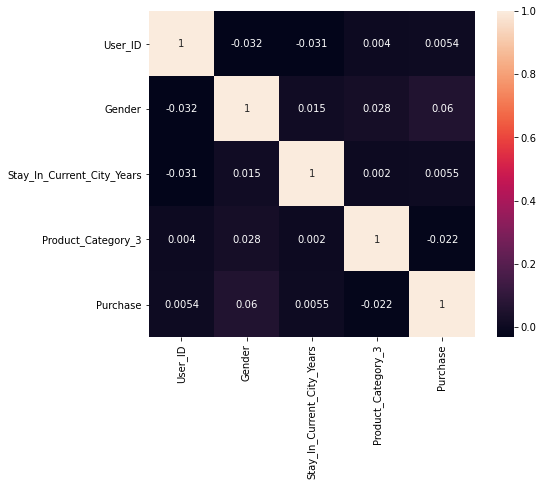

In [23]:
plt.figure(figsize = (8,6))
corr = data.corr()
sns.heatmap(corr,robust=True,annot=True,square=True)
#plt.savefig('deneme.png')

<font color=blue>

**Questions that I wonder the answers**
    
- Which users spend a lot of money and how much (top 10)
    - which product type do they buy?

</font>


In [24]:
best_customers = data.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False)[:10]
best_customers

User_ID
1004277    10536783
1001680     8699232
1002909     7577505
1001941     6817493
1000424     6573609
1004448     6565878
1001015     6511302
1003391     6476786
1001181     6387899
1000549     6310604
Name: Purchase, dtype: int64

In [25]:
def most_frequent(user_id):
    "Gives you the most frequent 3 Product Category 1 for given user"
    data[data['User_ID'] ==  user_id].Product_Category_1.value_counts()[:5]
    return  data[data['User_ID'] ==  user_id].Product_Category_1.value_counts()[:3].index,data[data['User_ID'] ==  user_id].Product_Category_1.value_counts()[:3].values 

In [26]:
for i in best_customers.index:
    print(i,"\n","product category and frequency:",most_frequent(i))

1004277 
 product category and frequency: (Int64Index([8, 1, 5], dtype='int64'), array([276, 209, 177]))
1001680 
 product category and frequency: (Int64Index([5, 8, 1], dtype='int64'), array([273, 234, 170]))
1002909 
 product category and frequency: (Int64Index([1, 5, 8], dtype='int64'), array([202, 133, 129]))
1001941 
 product category and frequency: (Int64Index([5, 1, 8], dtype='int64'), array([248, 185, 138]))
1000424 
 product category and frequency: (Int64Index([5, 1, 8], dtype='int64'), array([165, 159, 145]))
1004448 
 product category and frequency: (Int64Index([1, 5, 8], dtype='int64'), array([183, 126,  99]))
1001015 
 product category and frequency: (Int64Index([8, 5, 1], dtype='int64'), array([246, 192,  87]))
1003391 
 product category and frequency: (Int64Index([5, 8, 1], dtype='int64'), array([237, 153, 127]))
1001181 
 product category and frequency: (Int64Index([5, 8, 1], dtype='int64'), array([220, 215, 204]))
1000549 
 product category and frequency: (Int64Index([

<font color=blue>
    
**Mostly they buy 8,1,5 so what are they???**

</font>

<font color=blue>
    
**What are the most frequent bought and most profitable products?**

</font>


In [27]:
# Important products, most profitables
data.groupby('Product_ID').sum().Purchase[:10].sort_values(ascending=False)

Product_ID
P00000142    12592163
P00000642     7635578
P00001042     6787184
P00000242     3914901
P00000742     1435959
P00000342     1261383
P00000542      791219
P00000942      573183
P00000442      441173
P00000842      360314
Name: Purchase, dtype: int64

In [28]:
# Most frequent bought
data.Product_ID.value_counts()[:10]

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
Name: Product_ID, dtype: int64

<font color=blue>
    
**Does marital status or gender affect the purchase?**

</font>


In [29]:
data[data['Gender'] == 1]['Purchase']

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
537572    11664
537573    19196
537574     8043
537575     7172
537576     6875
Name: Purchase, Length: 405380, dtype: int64

In [30]:
def analyze_feature(column_name):
    
    print("\nPurchase average per unique element -- > \n",
      data.groupby(column_name).mean()['Purchase'].sort_values(ascending=False))
    
    pivot_1 = \
    data.pivot_table(index = column_name, values="Purchase", aggfunc=np.mean) # It takes the average
    pivot_1.plot(kind='bar',figsize=(12,8))
    plt.xlabel(column_name)
    plt.ylabel("Purchase")
    plt.title("average purchase for unique variables")
    plt.xticks(rotation=0)
    plt.show()
    
    
    print("Number of purchases per unique element -- > \n",
        data[column_name].value_counts().sort_values(ascending=False))
    
    plt.figure(figsize = (12,8))
    sns.countplot(data[column_name])
    plt.show()
    
    print("\nPurchase summation per unique element -- > \n",
          data.groupby(column_name).sum()['Purchase'].sort_values(ascending=False))
    
    pivot_2 = \
    data.pivot_table(index = column_name, values="Purchase", aggfunc=np.sum) # It takes the total
    pivot_2.plot(kind='bar',figsize=(12,8))
    plt.xlabel(column_name)
    plt.ylabel("Purchase")
    plt.title("total purchase for unique variables")
    plt.xticks(rotation=0)
    plt.show()
    
    


Purchase average per unique element -- > 
 Gender
1   9,504.772
0   8,809.761
Name: Purchase, dtype: float64


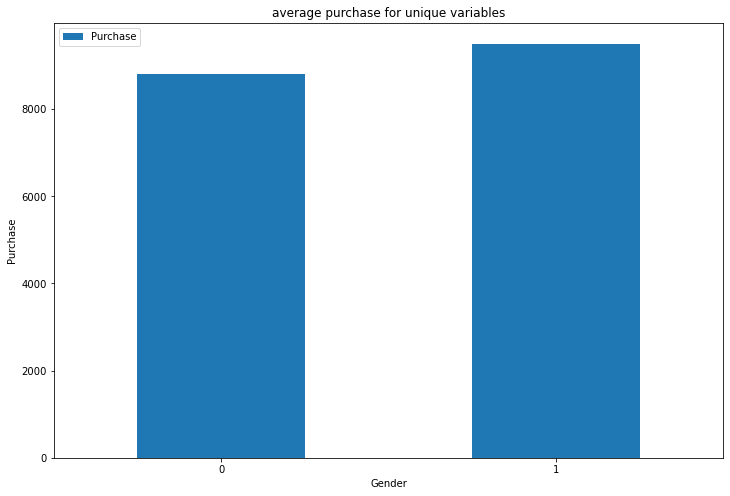

Number of purchases per unique element -- > 
 1    405380
0    132197
Name: Gender, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


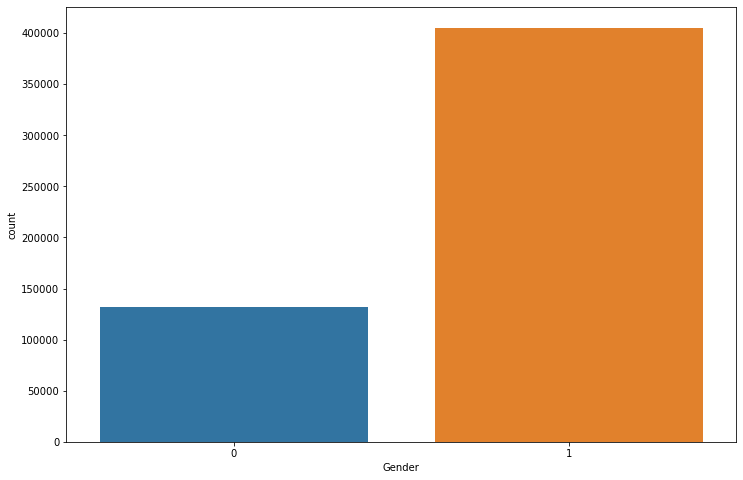


Purchase summation per unique element -- > 
 Gender
1    3853044357
0    1164624021
Name: Purchase, dtype: int64


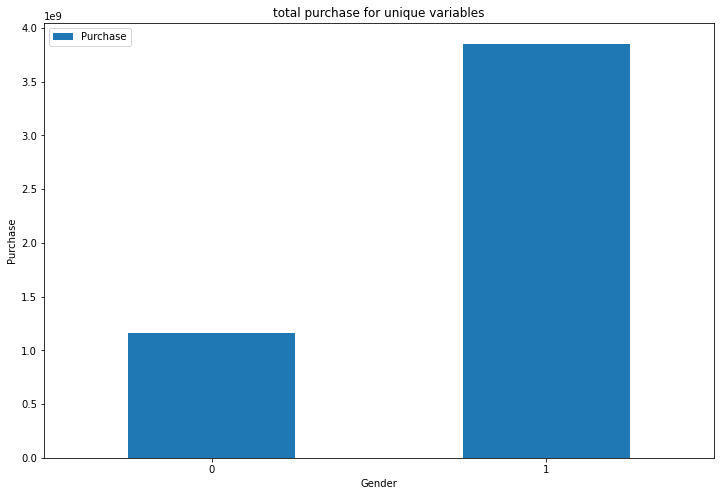

In [31]:
analyze_feature('Gender')

/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

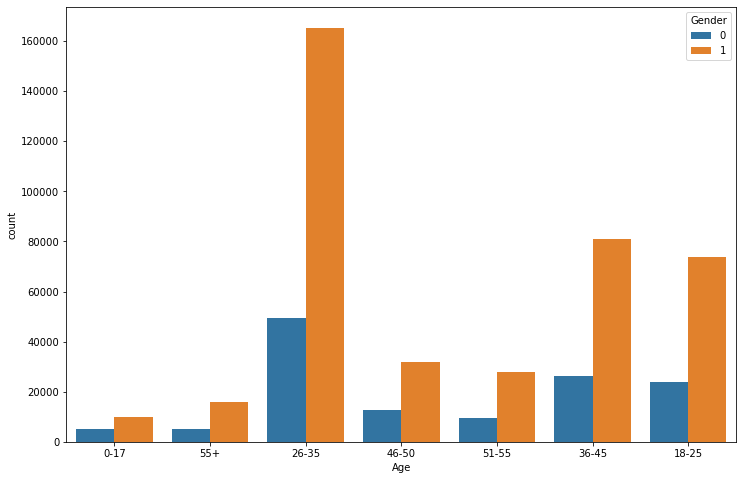

In [32]:
plt.figure(figsize = (12,8))
sns.countplot(data['Age'], hue=data['Gender'])

<font color=blue>
    
**What is the effect of age to purchase?**

</font>


Purchase average per unique element -- > 
 Age
51-55   9,620.617
55+     9,453.899
36-45   9,401.479
26-35   9,314.589
46-50   9,284.872
18-25   9,235.198
0-17    9,020.127
Name: Purchase, dtype: float64


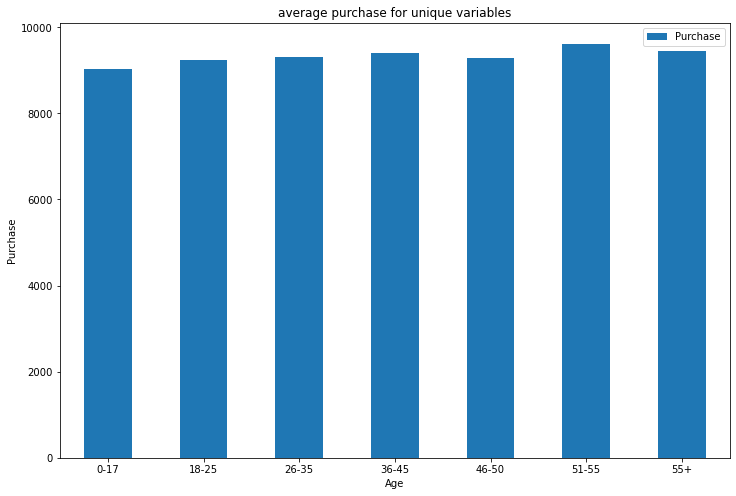

Number of purchases per unique element -- > 
 26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


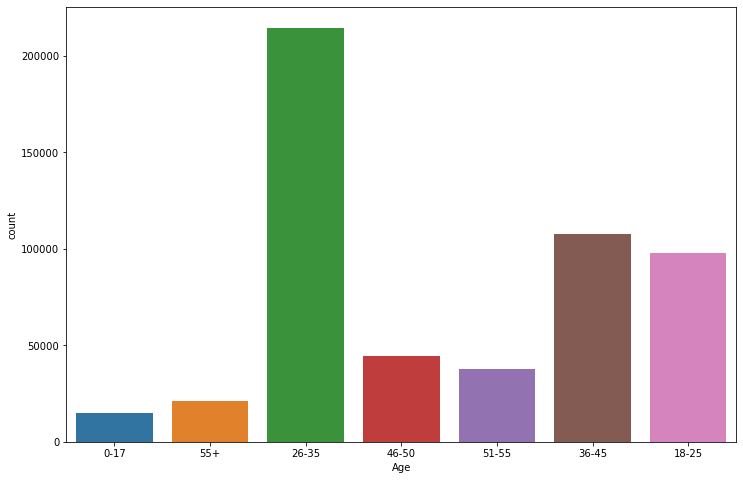


Purchase summation per unique element -- > 
 Age
26-35    1999749106
36-45    1010649565
18-25     901669280
46-50     413418223
51-55     361908356
55+       197614842
0-17      132659006
Name: Purchase, dtype: int64


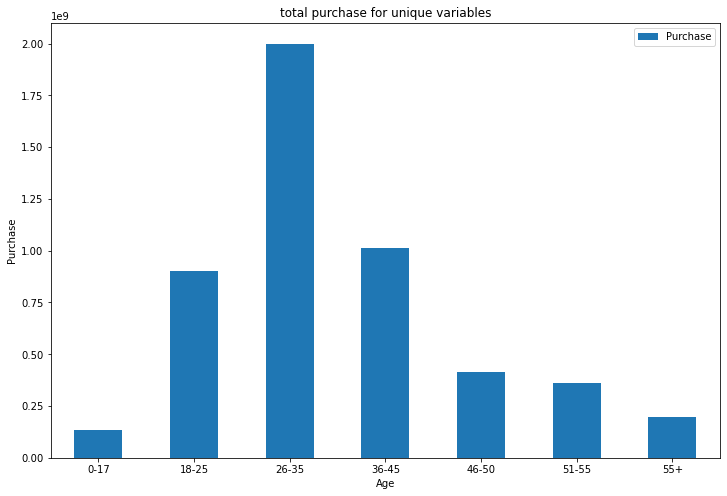

In [33]:
analyze_feature('Age')

26-45 and 36-45 are important binds for us 


Purchase average per unique element -- > 
 Marital_Status
1   9,334.633
0   9,333.325
Name: Purchase, dtype: float64


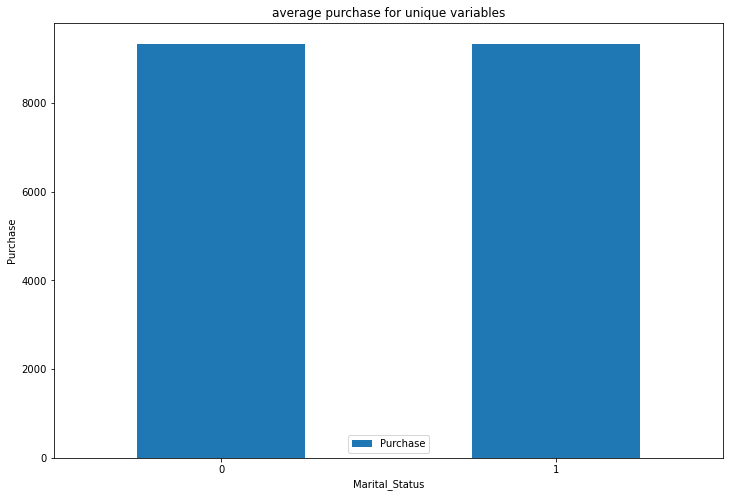

Number of purchases per unique element -- > 
 0    317817
1    219760
Name: Marital_Status, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


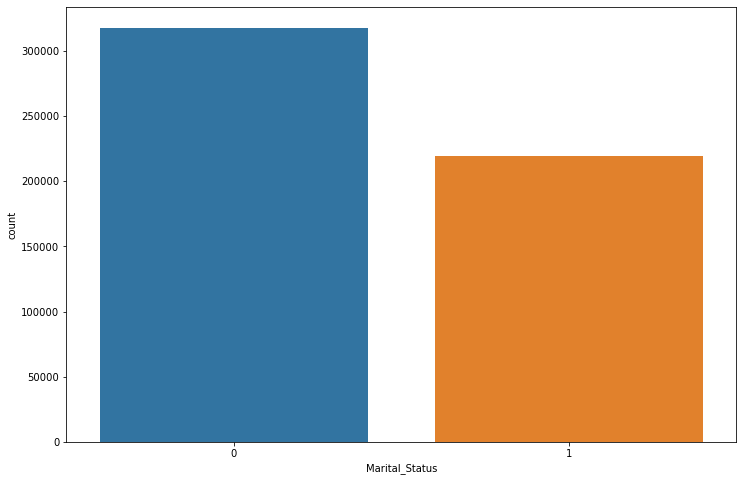


Purchase summation per unique element -- > 
 Marital_Status
0    2966289500
1    2051378878
Name: Purchase, dtype: int64


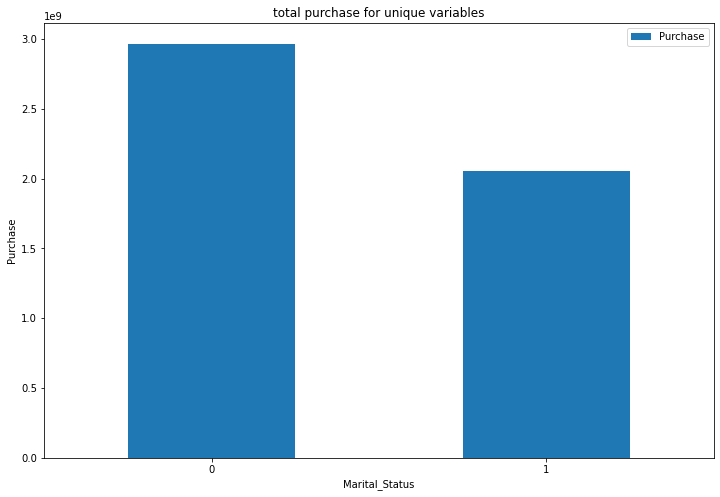

In [34]:
analyze_feature('Marital_Status')


Purchase average per unique element -- > 
 Product_Category_1
10   19,679.974
7    16,373.830
6    15,837.894
9    15,538.297
15   14,776.422
16   14,764.157
1    13,607.701
14   13,145.452
2    11,255.681
17   10,156.441
3    10,096.842
8     7,497.355
5     6,238.004
11    4,682.934
18    2,975.308
4     2,328.863
12    1,351.196
13      722.619
Name: Purchase, dtype: float64


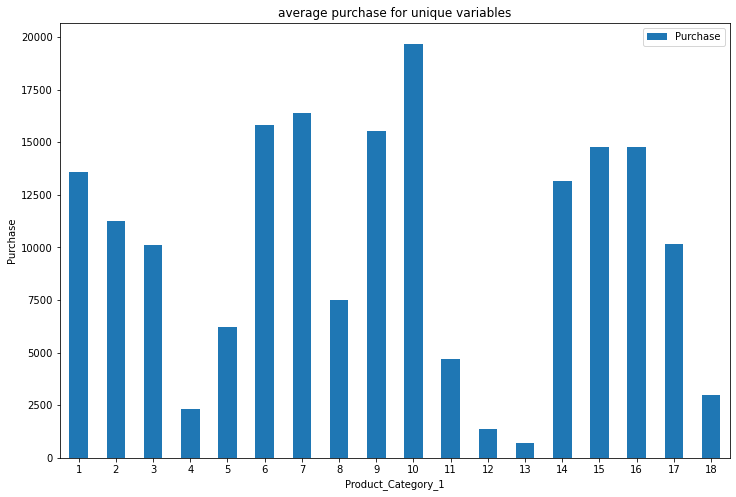

Number of purchases per unique element -- > 
 5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


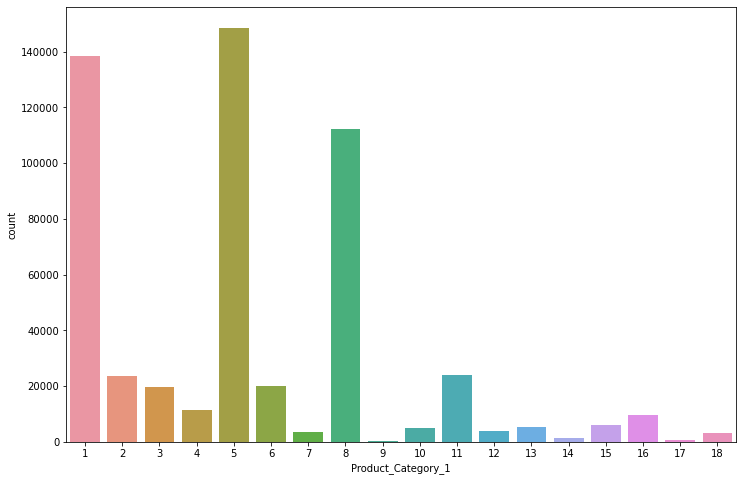


Purchase summation per unique element -- > 
 Product_Category_1
1     1882666325
5      926917497
8      840693394
6      319355286
2      264497242
3      200412211
16     143168035
11     112203088
10      99029631
15      91658147
7       60059209
4       26937957
14      19718178
18       9149071
9        6277472
17       5758702
12       5235883
13       3931050
Name: Purchase, dtype: int64


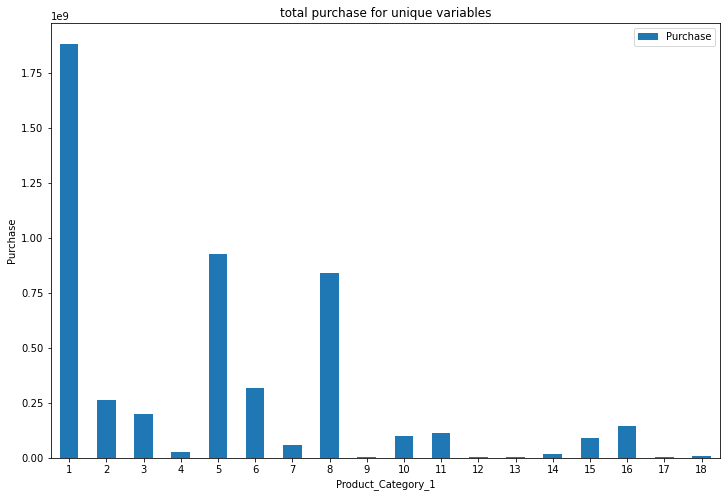

In [35]:
analyze_feature('Product_Category_1')


Purchase average per unique element -- > 
 Product_Category_2
10   15,656.015
2    13,621.741
6    11,500.586
3    11,229.533
15   10,358.723
16   10,298.676
4    10,218.319
13    9,672.264
17    9,416.534
18    9,370.698
5     9,034.055
11    8,935.682
8     8,403.663
9     7,282.594
14    7,106.357
12    6,968.662
7     6,877.234
Name: Purchase, dtype: float64


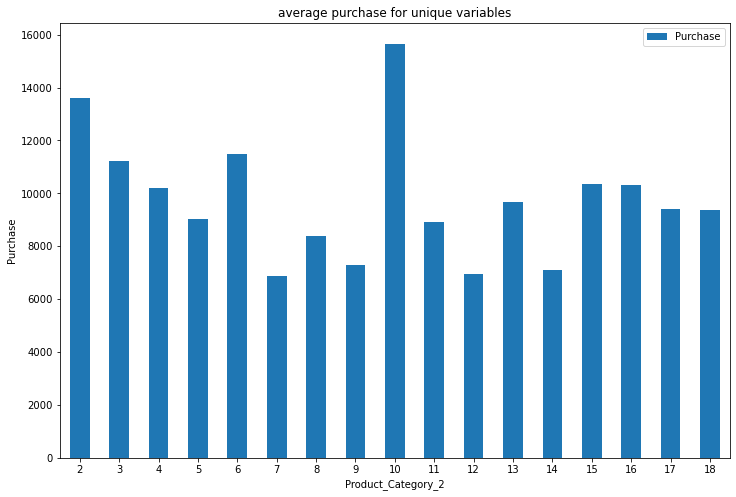

Number of purchases per unique element -- > 
 8     230044
14     54158
2      48481
16     42602
15     37317
5      25874
4      25225
6      16251
11     13945
17     13130
13     10369
9       5591
12      5419
10      2991
3       2835
18      2730
7        615
Name: Product_Category_2, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


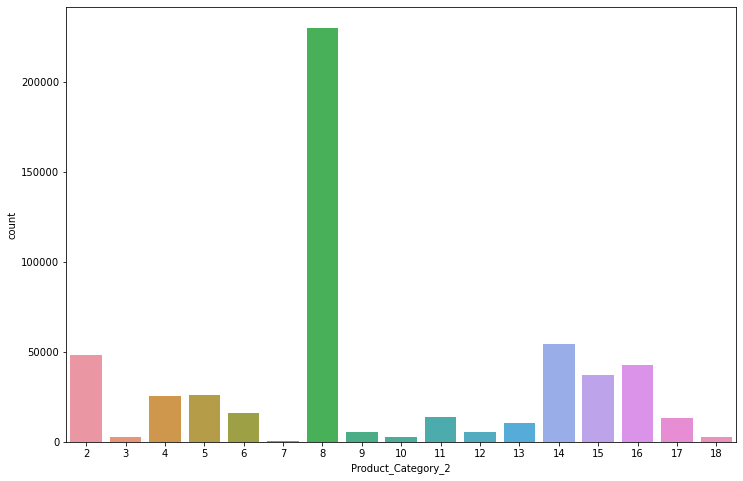


Purchase summation per unique element -- > 
 Product_Category_2
8     1933212351
2      660395610
16     438744196
15     386556477
14     384866069
4      257757097
5      233747130
6      186896021
11     124608092
17     123639094
13     100291709
10      46827140
9       40716981
12      37763181
3       31835725
18      25582006
7        4229499
Name: Purchase, dtype: int64


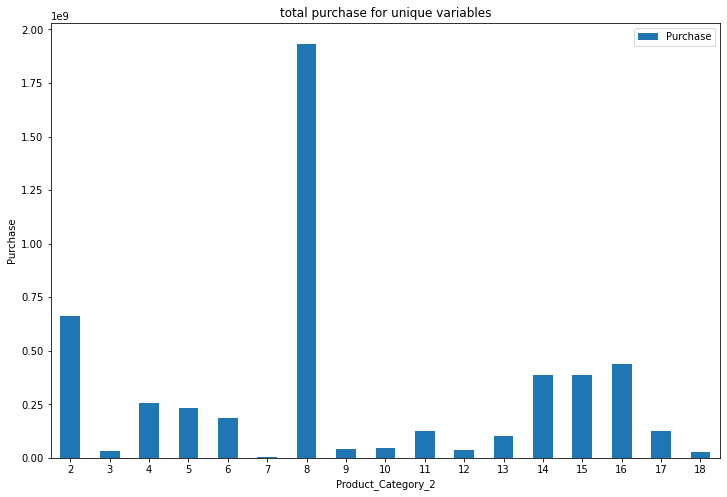

In [36]:
analyze_feature('Product_Category_2')

<font color=blue>
    
**What is the effect of job to purchase?**

</font>



Purchase average per unique element -- > 
 Occupation
17   9,906.379
12   9,883.052
15   9,866.240
8    9,576.509
14   9,568.536
7    9,502.175
16   9,457.133
13   9,424.449
5    9,388.849
6    9,336.379
11   9,299.467
4    9,279.027
3    9,238.077
18   9,233.671
0    9,186.947
10   9,052.836
2    9,025.939
1    9,017.703
20   8,881.100
19   8,754.249
9    8,714.336
Name: Purchase, dtype: float64


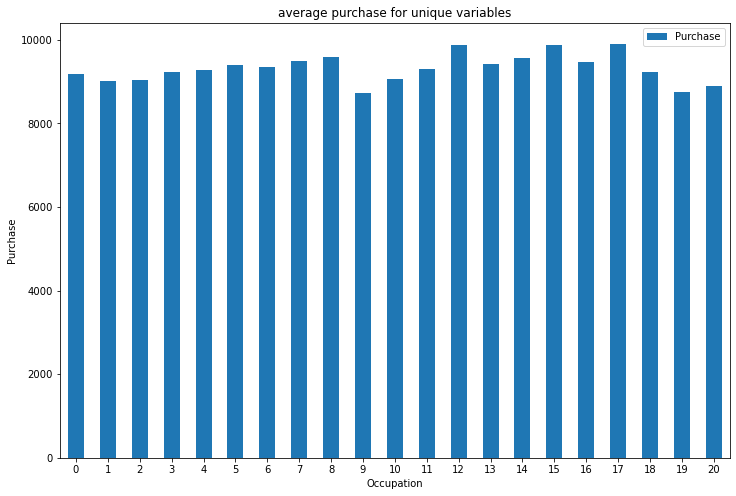

Number of purchases per unique element -- > 
 4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


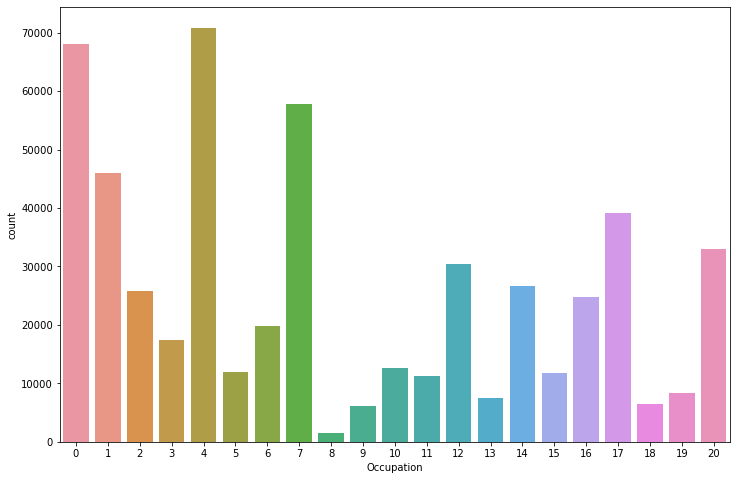


Purchase summation per unique element -- > 
 Occupation
4     657530393
0     625814811
7     549282744
1     414552829
17    387240355
12    300672105
20    292276985
14    255594745
16    234442330
2     233275393
6     185065697
3     160428450
15    116540026
10    114273954
5     112525355
11    105437359
19     73115489
13     71135744
18     60249706
9      53619309
8      14594599
Name: Purchase, dtype: int64


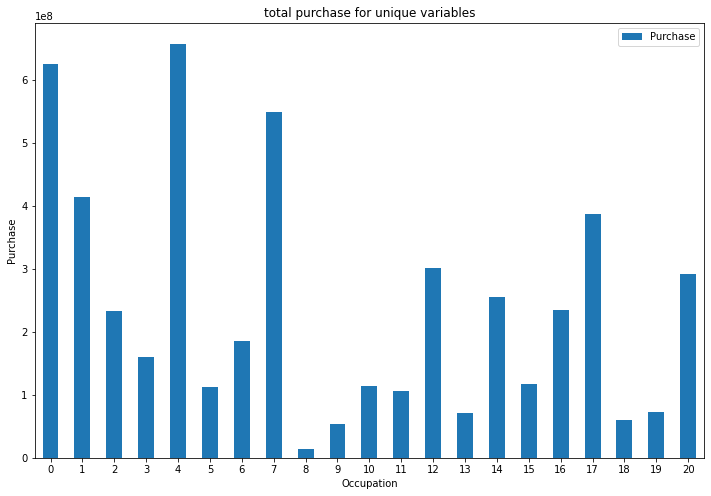

In [37]:
analyze_feature('Occupation')

4,0,7,1 are important jobs for us


Purchase average per unique element -- > 
 City_Category
C   9,844.442
B   9,198.658
A   8,958.011
Name: Purchase, dtype: float64


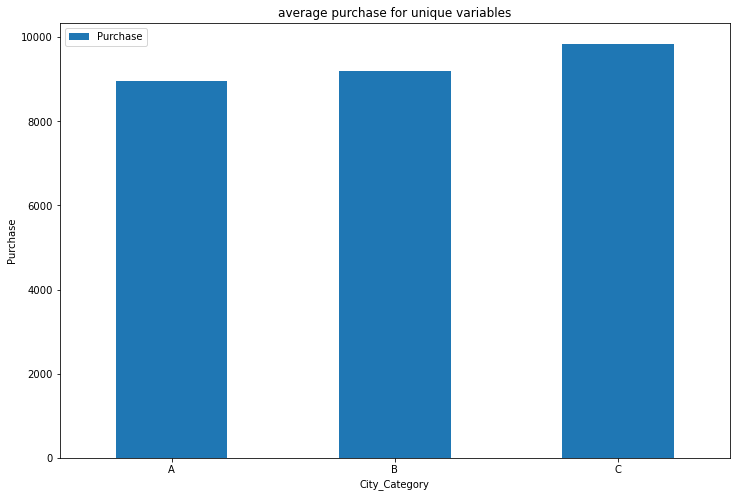

Number of purchases per unique element -- > 
 B    226493
C    166446
A    144638
Name: City_Category, dtype: int64


/home/john/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


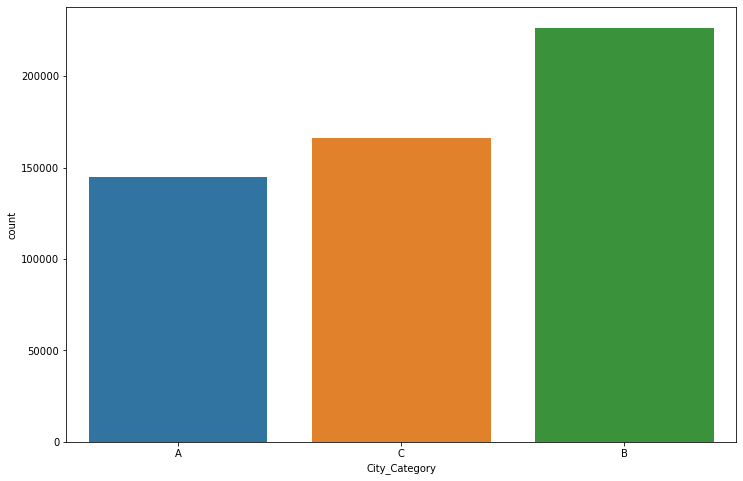


Purchase summation per unique element -- > 
 City_Category
B    2083431612
C    1638567969
A    1295668797
Name: Purchase, dtype: int64


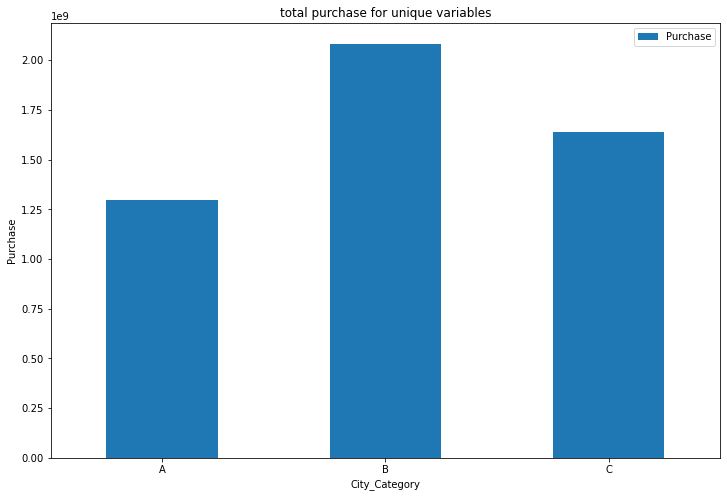

In [38]:
analyze_feature('City_Category')

B > C > A

<font color=blue>
    
**Analyze the purchase itself**

</font>

/home/john/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

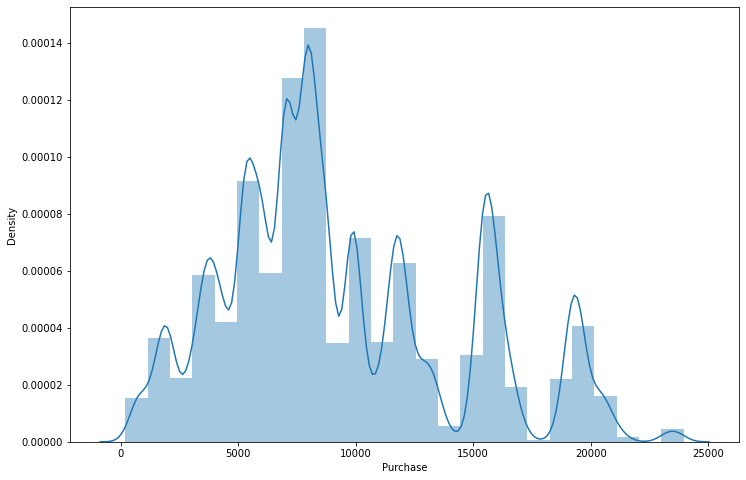

In [39]:
plt.figure(figsize=(12,8))
sns.distplot(data['Purchase'],bins=25)

In [40]:
print ("Skew is:", data['Purchase'].skew())
print("Kurtosis: %f" % data['Purchase'].kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


In [41]:
data['Purchase'].describe()

count   537,577.000
mean      9,333.860
std       4,981.022
min         185.000
25%       5,866.000
50%       8,062.000
75%      12,073.000
max      23,961.000
Name: Purchase, dtype: float64

In [42]:
data[data['Purchase'] == 23961]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,1,26-35,4,A,2,1,10,15,nan,23961
93016,1002272,P00052842,1,26-35,0,C,1,0,10,15,nan,23961
370891,1003160,P00052842,1,26-35,17,C,3,0,10,15,nan,23961


In [43]:
data[data['Purchase'] == 185]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
27602,1004227,P00171342,1,26-35,19,A,0,0,13,16,nan,185
377309,1004048,P00041442,0,36-45,1,B,1,0,13,14,16.000,185
403039,1001968,P00102142,1,26-35,11,B,2,0,13,16,nan,185
411541,1003391,P00041442,1,18-25,4,A,0,0,13,14,16.000,185
